In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import uunet.multinet as ml
import diptest
from latent_ideology.latent_ideology_class import latent_ideology as li
import networkx as nx
import matplotlib.colors as mcolors
from utils import *

In [2]:
n_cop = '26'
n_influencers = 100

folder = '/Users/alessiogandelli/data/cop' + str(n_cop) + '/'
projected_path = folder + 'networks/cop' + str(n_cop) +'_retweet_network_ml.gml'
topic_label = json.load(open(folder + 'cache/labels_cop'+str(n_cop)+'.json'))
topic_label = {int(k): v for k, v in topic_label.items()}# key float to int

retweet_df_path = folder + 'cache/retweets_labeled_cop'+str(n_cop)+'.pkl'
tweet_cop26_path = folder + 'cache/tweets_cop'+str(n_cop)+'.pkl'

retweet_df = pd.read_pickle(retweet_df_path)
tweet_cop26 = pd.read_pickle(tweet_cop26_path)

mln = ml.read(projected_path)   # multilayer network

layers = ml.to_nx_dict(mln) # dictionary where we have a networkx graph for each layer
layers = {int(float(k)): v for k, v in layers.items()} # key float to int


rt_net_path = folder + 'networks/cop'+str(n_cop)+'_retweet_network.gml' 
rt_net = nx.read_gml(rt_net_path)

In [16]:
users_df = pd.DataFrame(columns=['target'])
influencers_df = pd.DataFrame(columns=['source'])
#res = get_polarization_by_layer(layers, n_influencers = 100, n = 2)



#res = {}

for topic, r in res.items():

    r[1]['topic'] = topic
    r[2]['topic'] = topic

    r[1].rename(columns={'user':'target'}, inplace=True)
    r[2].rename(columns={'user':'source'}, inplace=True)

    users_df = pd.concat([users_df, r[1]], ignore_index=True)
    influencers_df = pd.concat([influencers_df, r[2]], ignore_index=True)


pivot_df = users_df.pivot(index='target', columns='topic', values='score')
inf_df = influencers_df.pivot(index='source', columns='topic', values='score')


#users
pivot_df['avg_score'] = pivot_df.mean(axis=1, numeric_only=True)
pivot_df['n_topics'] = pivot_df.count(axis=1) -1 # exclude avg score
pivot_df['std_score'] = pivot_df.drop(columns=['n_topics', 'avg_score']).std(axis=1)
pivot_df['team'] = pivot_df['avg_score'].apply(lambda x: 1 if x > 0 else -1)

global_avg = pivot_df['avg_score'].mean()



#influencers 
inf_df['avg_score'] = inf_df.mean(axis=1, numeric_only=True)
inf_df['n_topics'] = inf_df.count(axis=1) -1 # exclude avg score
inf_df['std_score'] = inf_df.drop(columns=['n_topics', 'avg_score']).std(axis=1)
inf_df['team'] = inf_df['avg_score'].apply(lambda x: 1 if x > 0 else -1)

In [4]:
# %%
print('sample size', len(inf_df))
print('user present in only one topic', len(inf_df[inf_df['n_topics'] == 1]))
print('user present in more than 10 topics', len(inf_df[inf_df['n_topics'] > 10]))
print('average n of topics', inf_df['n_topics'].mean())

print('average score', inf_df['avg_score'].mean())
print('average std', inf_df['std_score'].mean())

sample size 1715
user present in only one topic 1404
user present in more than 10 topics 7
average n of topics 1.383673469387755
average score -0.5813993744164961
average std 0.3407185330290883


In [5]:

print('sample size', len(pivot_df))
print('user present in only one topic', len(pivot_df[pivot_df['n_topics'] == 1]))
print('user present in more than 10 topics', len(pivot_df[pivot_df['n_topics'] > 10]))
print('average n of topics', pivot_df['n_topics'].mean())

print('average score', pivot_df['avg_score'].mean())
print('average std', pivot_df['std_score'].mean())

# avg std by team 


print('average score for team 1', pivot_df[pivot_df['team'] == 1]['avg_score'].mean())
print('average score for team -1', pivot_df[pivot_df['team'] == -1]['avg_score'].mean())

print('average std for team 1', pivot_df[pivot_df['team'] == 1]['std_score'].mean())
print('average std for team -1', pivot_df[pivot_df['team'] == -1]['std_score'].mean())



sample size 22395
user present in only one topic 16200
user present in more than 10 topics 54
average n of topics 1.5664210761330655
average score -0.6857586009891173
average std 0.22234568474715116
average score for team 1 0.5830659770615977
average score for team -1 -0.8306318550501318
average std for team 1 0.9167105472437844
average std for team -1 0.1968995828584693


In [8]:
#drop n_topics = 1 
pivot_df = pivot_df[pivot_df['n_topics'] > 1]

pivot_df['topics_sx'] = pivot_df.drop(columns=['avg_score', 'n_topics', 'std_score', 'team']).apply(lambda x: len(x[x > 0]), axis=1)
pivot_df['topics_dx'] = pivot_df.drop(columns=['avg_score', 'n_topics', 'std_score', 'team']).apply(lambda x: len(x[x < 0]), axis=1)

# count the number of topics  positive for team -1 and negative for team 1
pivot_df['opposite_team'] = pivot_df.apply(lambda x: x['topics_sx'] if x['team'] == -1 else x['topics_dx'], axis=1)
pivot_df['same_team'] = pivot_df.apply(lambda x: x['topics_sx'] if x['team'] == 1 else x['topics_dx'], axis=1)


pivot_df['team_diff'] = pivot_df['same_team'] - pivot_df['opposite_team']

In [9]:
pivot_df

topic,0.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,12.0,...,68.0,avg_score,n_topics,std_score,team,topics_sx,topics_dx,opposite_team,same_team,team_diff
target,,,,,,,,,,,,,,,,,,,,,
1000002715999784961,NaN,NaN,-0.945361,NaN,NaN,NaN,NaN,NaN,-0.934571,NaN,...,NaN,-0.939966,2,0.007630,-1,0,2,0.0,2.0,2.0
1000242837852688385,NaN,NaN,NaN,NaN,NaN,NaN,-0.912974,NaN,NaN,NaN,...,NaN,-0.878641,2,0.048554,-1,0,2,0.0,2.0,2.0
1001178326646521862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.928636,NaN,...,NaN,-0.757112,2,0.242571,-1,0,2,0.0,2.0,2.0
1001552492138762240,-0.896053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.934703,NaN,...,NaN,-0.894672,3,0.040739,-1,0,3,0.0,3.0,3.0
1001867803937435653,-0.897445,NaN,-0.945941,NaN,NaN,NaN,NaN,NaN,-0.934890,NaN,...,NaN,-0.926092,3,0.025417,-1,0,3,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998171318,NaN,NaN,NaN,NaN,NaN,NaN,-0.931902,NaN,NaN,NaN,...,NaN,-0.768583,3,0.215838,-1,0,3,0.0,3.0,3.0
999441404,-0.872998,NaN,-0.945906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.909452,2,0.051554,-1,0,2,0.0,2.0,2.0
999735281090777089,NaN,NaN,-0.945932,NaN,NaN,NaN,NaN,NaN,-0.930067,NaN,...,NaN,-0.909099,3,0.050682,-1,0,3,0.0,3.0,3.0


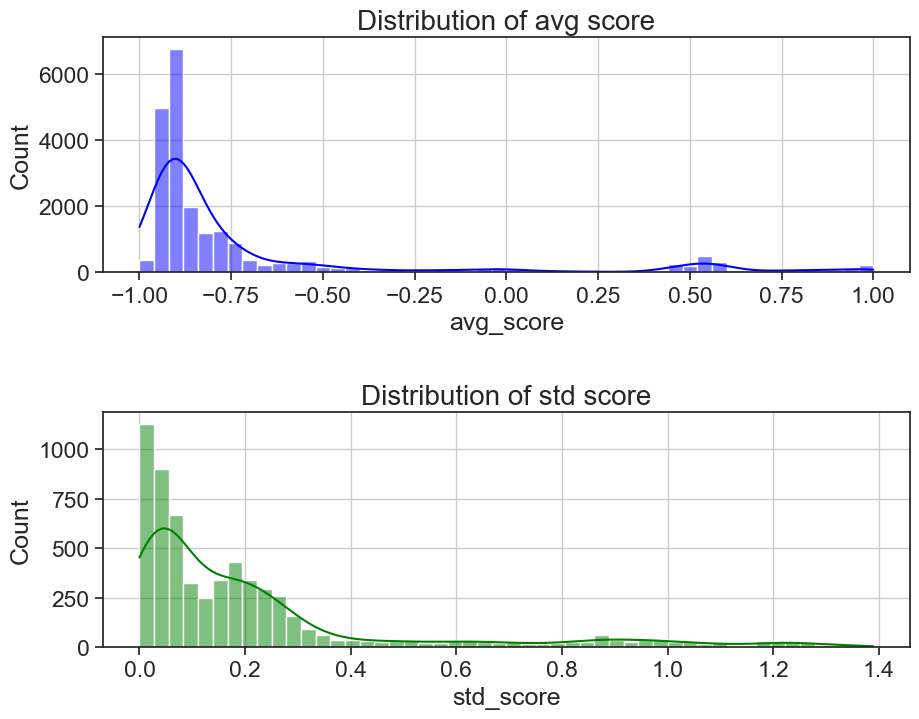

In [32]:
# sns plot of avg_score and std_score histogram

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale=1.5)
sns.set_style("ticks")

fig, ax = plt.subplots(2, 1)
sns.histplot(data=pivot_df, x="avg_score",  ax=ax[0], kde=True, bins=50, color='blue')
sns.histplot(data=pivot_df, x="std_score",  ax=ax[1], kde=True, bins=50, color='green')

# title 
ax[0].set_title('Distribution of avg score', fontsize=20)
ax[1].set_title('Distribution of std score', fontsize=20)

#grid
ax[0].grid()
ax[1].grid()

#space between plots
fig.tight_layout(pad=2.0)

# save fig pdf 
fig.savefig('avg_std_score.pdf', bbox_inches='tight', dpi=800)

